<a href="https://colab.research.google.com/github/guilhermelaviola/FantasySoccer/blob/main/CzechoslovakiaNTStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Collecting the data**

This data has been collected from the Czech Republic and Slovakia national football team Wikipedia pages.

In [47]:
# Importing the dataset:
former_countries = pd.ExcelFile('former-countries.xlsx')
cs = pd.read_excel(former_countries, 'Czechoslovakia')

# Displaying the last 5 row:
cs.tail()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Nationality
88,NaN,MF,Máté Szolgai,27 July 2003 (age 21),0,0,Slovakia DAC Dunajská Streda,Slovakia
89,NaN,MF,Erik Jirka,19 September 1997 (age 27),10,2,Czech Republic Viktoria Plzeň,Slovakia
90,NaN,FW,Lukáš Haraslín INJ,26 May 1996 (age 28),44,7,Czech Republic Sparta Prague,Slovakia
91,NaN,FW,Róbert Polievka,9 June 1996 (age 28),10,0,Hungary MTK Budapest,Slovakia
92,NaN,FW,Róbert Mak,8 March 1991 (age 33),81,16,Slovakia Slovan Bratislava,Slovakia


In [48]:
# Displaying the number of rows and columns in the dataset:
cs.shape

(93, 8)

In [49]:
# Displaying the datatypes presented in the columns:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Number         23 non-null     float64
 1   Position       93 non-null     object 
 2   Player         93 non-null     object 
 3   Date of birth  93 non-null     object 
 4   Matches        93 non-null     int64  
 5   Goals          93 non-null     int64  
 6   Club           93 non-null     object 
 7   Nationality    93 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 5.9+ KB


In [50]:
# Displaying general statistical information of the number data present in the dataset:
cs.describe()

,Number,Matches,Goals
count,23.00000,93.000000,93.000000
mean,12.00000,20.354839,2.075269
std,6.78233,25.936228,3.926600
min,1.00000,0.000000,0.000000
25%,6.50000,1.000000,0.000000
50%,12.00000,10.000000,0.000000
75%,17.50000,30.000000,2.000000
max,23.00000,134.000000,20.000000


# **Cleaning and transforming the data**

Columns to work on the data cleaning/transformation:
*   Position: Convert from the abbreviation to the actual position (e.g: GK to Goalkeeper).
*   Captain?: Based on the data in the 'Player' column, this column has got to have values such as 'captain', 'vice-captain', 'third-captain' or 'No'.

*   Player: Clean additional data, by removing words such as 'RET', 'INJ' or '(captain)'. Only the player name shall be displayed in this column.
*   Date of birth: Remove the ' (age xx)' after the actual date of birth, so this date can be converted to a datetime object.
*   Club: The club country name shown before the  club name shall be removed.

In [51]:
# Replacing abbreviations in the 'Position' column:
position_mapping = {
    'GK': 'Goalkeeper',
    'DF': 'Defender',
    'MF': 'Midfielder',
    'FW': 'Striker'
}

cs['Position'] = cs['Position'].replace(position_mapping)

In [52]:
# Creating the 'Captain?' column based on the 'Player' column:
def determine_captain_status(player):
    if '(captain)' in player:
        return 'First'
    elif '(vice-captain)' in player:
        return 'Second'
    elif '(third-captain)' in player:
        return 'Third'
    elif '(fourth-captain)' in player:
        return 'Fourth'
    else:
        return 'No'

cs['Captain?'] = cs['Player'].apply(determine_captain_status)

# Removing annotations from the 'Player' column:
cs['Player'] = cs['Player'].str.replace(r'\s*\(captain\)|\s*\(vice-captain\)|\s*\(third-captain\)|\s*\(fourth-captain\)', '', regex=True).str.strip()

In [53]:
# Removing rows with 'RET' in the 'Player' column:
cs = cs[~cs['Player'].str.contains(r'\bRET\b', na=False)]

# Cleaning the 'Player' column:
cs['Player'] = cs['Player'].str.replace(r'\s*(INJ|\(captain\)|\(vice-captain\)|\(third-captain\))', '', regex=True).str.strip()

In [54]:
# Cleaning the 'Date of birth' column:
cs['Date of birth'] = cs['Date of birth'].str.replace(r'\s*\(age\s*\d+\)', '', regex=True)

In [55]:
# Spliting 'Club' column into 'Club country' and 'Club' columns:
cs[['Club country', 'Club']] = cs['Club'].str.split(' ', n=1, expand=True)
# Pass 'expand=True' as a keyword argument, and 'n=1' for the max splits

In [72]:
# Displaying the last 5 row:
cs.tail()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Nationality,Captain?,Club country,Matches count,Goal count
88,NaN,Midfielder,Máté Szolgai,27 July 2003,0,0,DAC Dunajská Streda,Slovakia,No,Slovakia,Less than 20 matches played,Less than 5 goals scored
89,NaN,Midfielder,Erik Jirka,19 September 1997,10,2,Viktoria Plzeň,Slovakia,No,Czech Republic,Less than 20 matches played,Over 10 goals scored
90,NaN,Striker,Lukáš Haraslín,26 May 1996,44,7,Sparta Prague,Slovakia,No,Czech Republic,Over 25 matches played,Over 40 goals scored
91,NaN,Striker,Róbert Polievka,9 June 1996,10,0,MTK Budapest,Slovakia,No,Hungary,Less than 20 matches played,Over 10 goals scored
92,NaN,Striker,Róbert Mak,8 March 1991,81,16,Slovan Bratislava,Slovakia,No,Slovakia,Over 50 matches played,Over 40 goals scored


# **Displaying the data**

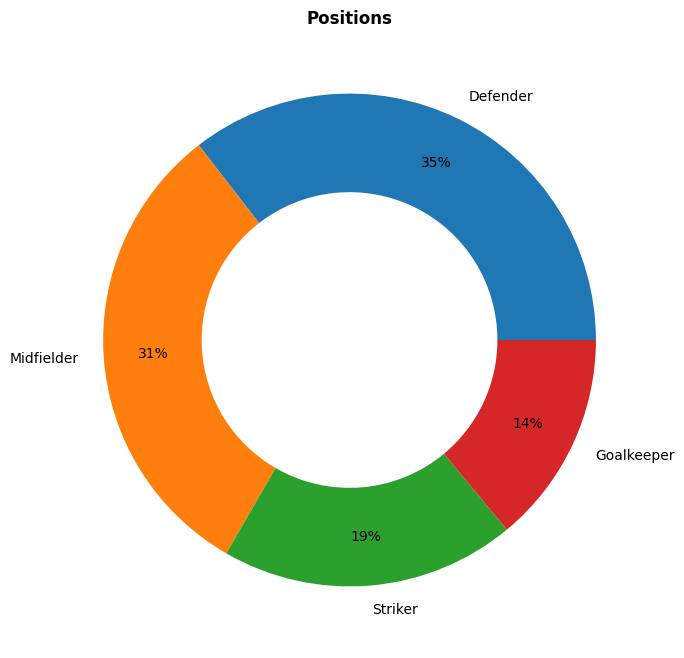

In [56]:
# Displaying the player's positions:
cs['Position'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Positions', fontweight = 'bold')
plt.show()

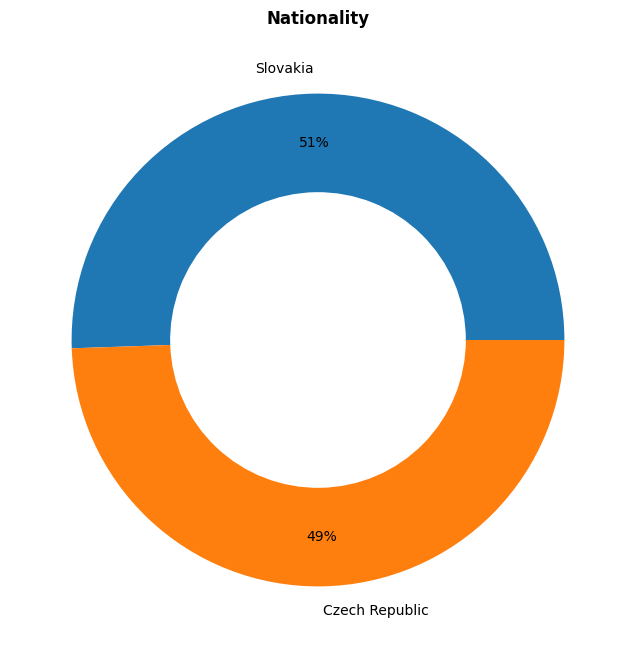

In [57]:
# Displaying the player's nationalities:
cs['Nationality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Nationality', fontweight = 'bold')
plt.show()

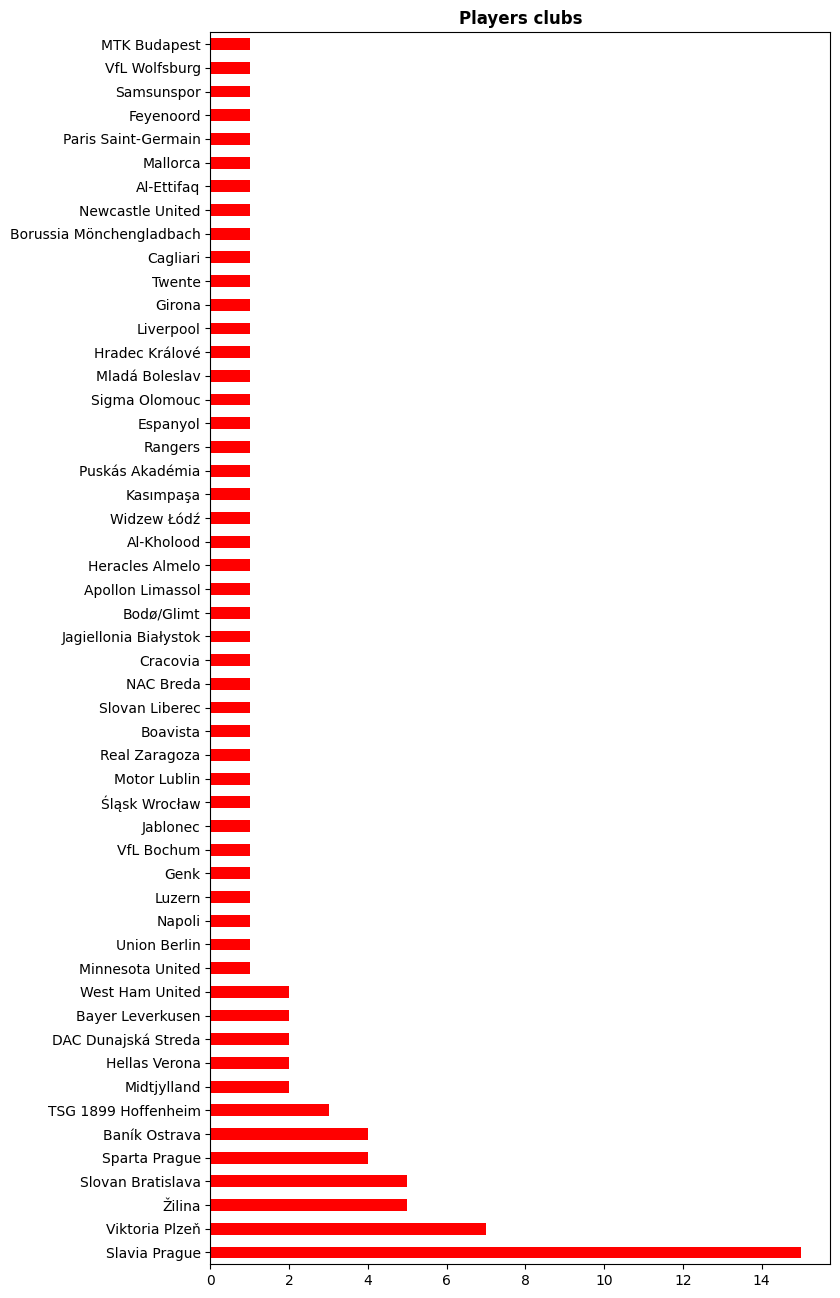

In [65]:
# Displaying the player's clubs:
cs['Club'].value_counts().plot(kind = 'barh', color = 'red', figsize = (8, 16))
plt.ylabel(None)
plt.title('Players clubs', fontweight = 'bold')
plt.show()

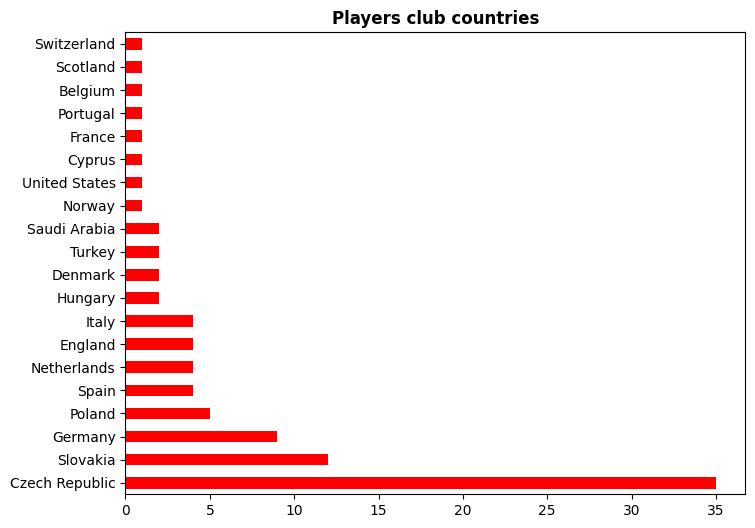

In [66]:
# Displaying the countries of the clubs the players defend:
cs['Club country'].value_counts().plot(kind = 'barh', color = 'red', figsize = (8, 6))
plt.ylabel(None)
plt.title('Players club countries', fontweight = 'bold')
plt.show()

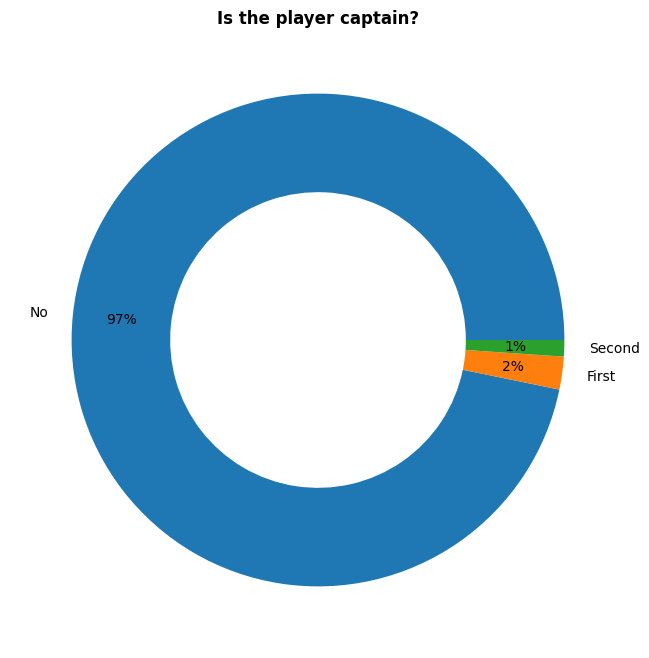

In [67]:
# Displaying if the player is captain of not:
cs['Captain?'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Is the player captain?', fontweight = 'bold')
plt.show()

In [68]:
# Checking the level of matches played by the players:
def matches_count(row):
  num_of_matches = row['Matches']
  if num_of_matches >= 25 and num_of_matches < 50:
    result = 'Over 25 matches played'
  elif num_of_matches >= 50 and num_of_matches < 100:
    result = 'Over 50 matches played'
  elif num_of_matches >= 100 and num_of_matches < 120:
    result = 'Over 100 matches played'
  elif num_of_matches >= 120:
    result = 'Over 120 matches played'
  else:
    result = 'Less than 20 matches played'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
cs['Matches count'] = cs.apply(matches_count, axis=1)
cs.head()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Nationality,Captain?,Club country,Matches count,Goal count
0,1.0,Goalkeeper,Matěj Kovář,17 May 2000,9,0,Bayer Leverkusen,Czech Republic,No,Germany,Less than 20 matches played,Over 5 goals scored
1,16.0,Goalkeeper,Antonín Kinský,13 March 2003,0,0,Slavia Prague,Czech Republic,No,Czech Republic,Less than 20 matches played,Less than 5 goals scored
2,23.0,Goalkeeper,Martin Jedlička,24 January 1998,0,0,Viktoria Plzeň,Czech Republic,No,Czech Republic,Less than 20 matches played,Less than 5 goals scored
3,3.0,Defender,Tomáš Holeš,31 March 1993,34,2,Slavia Prague,Czech Republic,No,Czech Republic,Over 25 matches played,Over 20 goals scored
4,4.0,Defender,Milan Havel,7 August 1994,5,0,Viktoria Plzeň,Czech Republic,No,Czech Republic,Less than 20 matches played,Over 5 goals scored


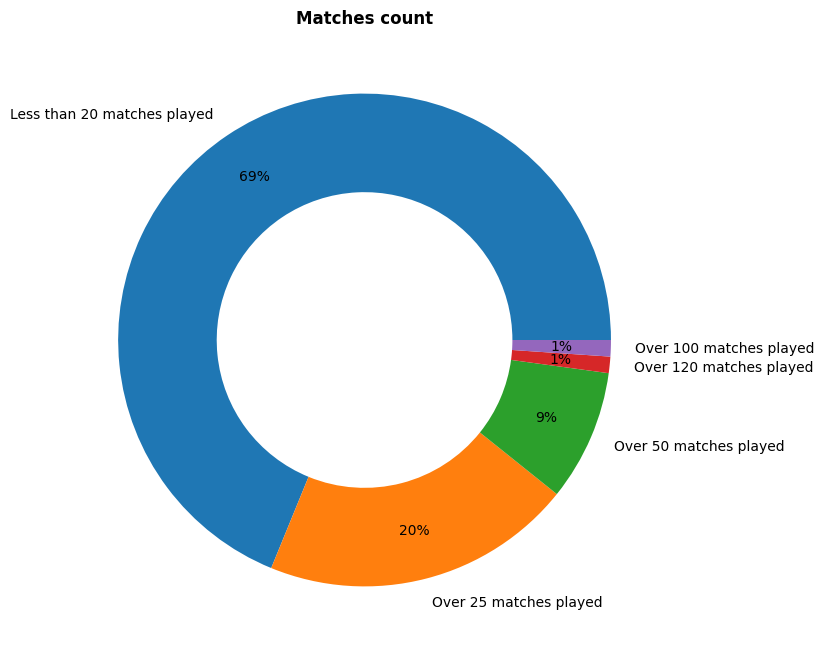

In [69]:
# Displaying the matches count result:
cs['Matches count'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Matches count', fontweight = 'bold')
plt.show()

In [70]:
# Checking the level of goals scored by the players:
def goals_count(row):
  num_of_goals = row['Matches']
  if num_of_goals >= 5 and num_of_goals < 10:
    result = 'Over 5 goals scored'
  elif num_of_goals >= 10 and num_of_goals < 20:
    result = 'Over 10 goals scored'
  elif num_of_goals >= 20 and num_of_goals < 40:
    result = 'Over 20 goals scored'
  elif num_of_goals >= 40:
    result = 'Over 40 goals scored'
  else:
    result = 'Less than 5 goals scored'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
cs['Goal count'] = cs.apply(goals_count, axis=1)
cs.head()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Nationality,Captain?,Club country,Matches count,Goal count
0,1.0,Goalkeeper,Matěj Kovář,17 May 2000,9,0,Bayer Leverkusen,Czech Republic,No,Germany,Less than 20 matches played,Over 5 goals scored
1,16.0,Goalkeeper,Antonín Kinský,13 March 2003,0,0,Slavia Prague,Czech Republic,No,Czech Republic,Less than 20 matches played,Less than 5 goals scored
2,23.0,Goalkeeper,Martin Jedlička,24 January 1998,0,0,Viktoria Plzeň,Czech Republic,No,Czech Republic,Less than 20 matches played,Less than 5 goals scored
3,3.0,Defender,Tomáš Holeš,31 March 1993,34,2,Slavia Prague,Czech Republic,No,Czech Republic,Over 25 matches played,Over 20 goals scored
4,4.0,Defender,Milan Havel,7 August 1994,5,0,Viktoria Plzeň,Czech Republic,No,Czech Republic,Less than 20 matches played,Over 5 goals scored


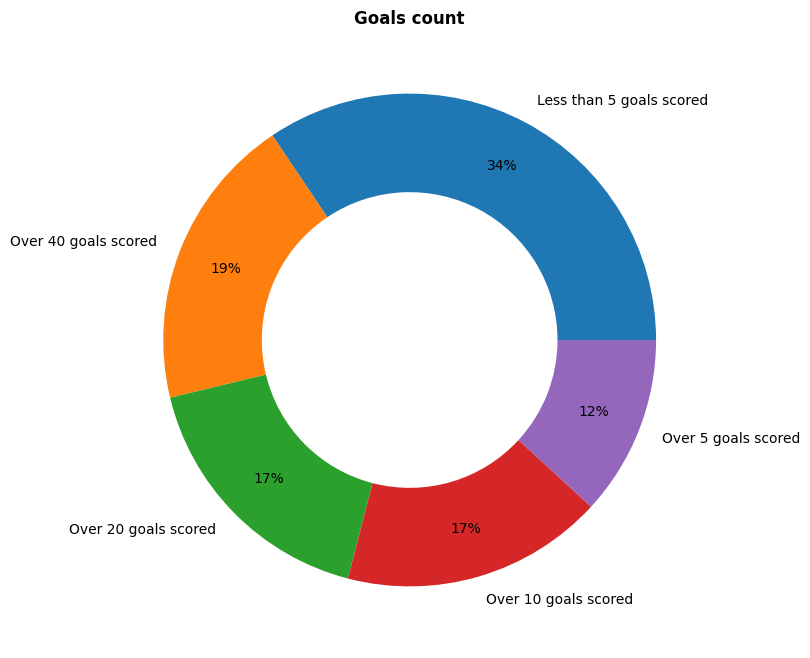

In [71]:
# Displaying the goals count result:
cs['Goal count'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Goals count', fontweight = 'bold')
plt.show()